In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
%config InlineBackend.figure_format = 'svg'  # Looks MUCH better than retina
# %config InlineBackend.figure_format = 'retina'

from sklearn import tree

import dtreeviz
from dtreeviz import decision_boundaries


### Load the Data set
df = pd.read_csv("diabetes.csv")

In [21]:
df = df.loc[df['BMI'] > 0]
df = df.loc[df['BloodPressure'] > 0]
df = df.loc[df['Glucose'] > 0]

In [22]:
from sklearn.model_selection import train_test_split
X = df[['BloodPressure', 'Age', 'Insulin', 'Glucose', 'BMI', 'Pregnancies', 'SkinThickness', 'DiabetesPedigreeFunction']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
### Qualitative Evaluation
test_set_y_preds = clf.predict(X_test)
print("Model performance on test set: ")
test_acc = accuracy_score(y_test, test_set_y_preds)
test_prec = precision_score(y_test, test_set_y_preds)
test_rec = recall_score(y_test, test_set_y_preds)
test_f1 = f1_score(y_test, test_set_y_preds)
print("Accuracy %.4f" % test_acc)
print("Precision %.4f" % test_prec)
print("Recall %.4f" % test_rec)
print("F1 %.4f" % test_f1)

print("\nModel performance on training set: ")
training_set_y_preds = clf.predict(X_train)
train_acc = accuracy_score(y_train, training_set_y_preds)
train_prec = precision_score(y_train, training_set_y_preds)
train_rec = recall_score(y_train, training_set_y_preds)
train_f1 = f1_score(y_train, training_set_y_preds)
print("Accuracy %.4f" % train_acc)
print("Precision %.4f" % train_prec)
print("Recall %.4f" % train_rec)
print("F1 %.4f" % train_f1)

print("\nDifference in Performance: ")
print("Accuracy %.4f" % (train_acc-test_acc))
print("Precision %.4f" % (train_prec-test_prec))
print("Recall %.4f" % (train_rec-test_rec))
print("F1 %.4f" % (train_f1-test_f1))

Model performance on test set: 
Accuracy 0.7448
Precision 0.5682
Recall 0.5814
F1 0.5747

Model performance on training set: 
Accuracy 0.7962
Precision 0.7366
Recall 0.6650
F1 0.6990

Difference in Performance: 
Accuracy 0.0514
Precision 0.1684
Recall 0.0837
F1 0.1243


In [38]:
#### This is me just messing around now, so idk

from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i))

Text(0, 0.5, 'F1 Score')

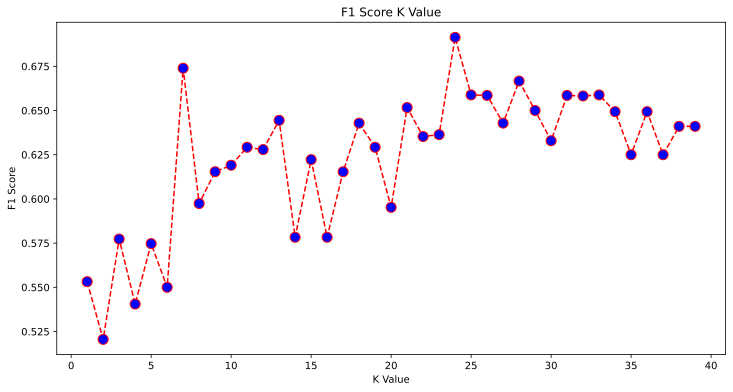

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [40]:
from sklearn.metrics import accuracy_score

accs = []

# Calculating accuracy score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    accs.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'F1 Score')

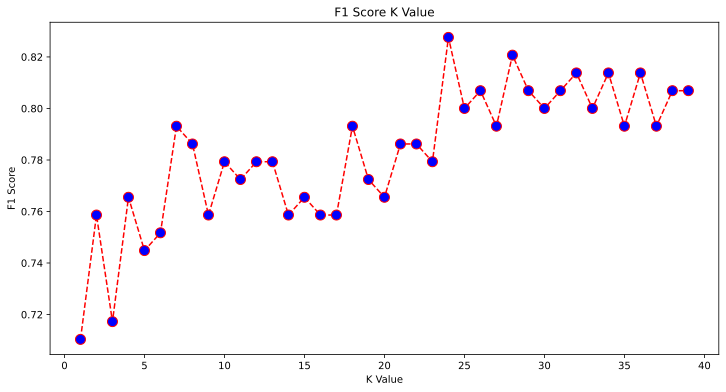

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accs, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [43]:
accs

[0.7103448275862069,
 0.7586206896551724,
 0.7172413793103448,
 0.7655172413793103,
 0.7448275862068966,
 0.7517241379310344,
 0.7931034482758621,
 0.7862068965517242,
 0.7586206896551724,
 0.7793103448275862,
 0.7724137931034483,
 0.7793103448275862,
 0.7793103448275862,
 0.7586206896551724,
 0.7655172413793103,
 0.7586206896551724,
 0.7586206896551724,
 0.7931034482758621,
 0.7724137931034483,
 0.7655172413793103,
 0.7862068965517242,
 0.7862068965517242,
 0.7793103448275862,
 0.8275862068965517,
 0.8,
 0.8068965517241379,
 0.7931034482758621,
 0.8206896551724138,
 0.8068965517241379,
 0.8,
 0.8068965517241379,
 0.8137931034482758,
 0.8,
 0.8137931034482758,
 0.7931034482758621,
 0.8137931034482758,
 0.7931034482758621,
 0.8068965517241379,
 0.8068965517241379]